In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("diabetes1.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


DOMAIN ANALYSIS

Pregnancies: Number of times pregnant (0–17); higher counts can affect metabolism and increase diabetes risk.

Glucose: 2-hour plasma glucose (mg/dL); key indicator (normal <100, diabetic ≥126); zeros imply missing.

BloodPressure: Diastolic BP in mm Hg (0–122); high BP often coexists with diabetes; zeros are invalid/missing.

SkinThickness: Triceps skin fold in mm (0–99); proxy for body fat and obesity risk; zeros denote missing.

Insulin: 2-hour serum insulin (μU/ml; 0–846); high values suggest insulin resistance; zeros indicate missing.

BMI: Body Mass Index (kg/m²; 0–67.1); >30 = obese and high diabetes risk; zeros are invalid/missing.

DiabetesPedigreeFunction: Genetic risk score (0.08–2.42); higher values indicate stronger family history influence.

Age: Patient age in years (21–81); risk increases notably after age 40.

Outcome: Target label (0 = non-diabetic, 1 = diabetic) used for classification.

Note 1: Features with zeros (Glucose, BP, SkinThickness, Insulin, BMI) represent missing data and require imputation or removal.

Note 2: Check for class imbalance in Outcome and consider feature correlation (e.g., Glucose, BMI, Insulin) before modeling.

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


EXPLORATORY DATA ANALYSIS

In [9]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


Step 1. Univariate Analysis

<Axes: xlabel='Pregnancies', ylabel='Count'>

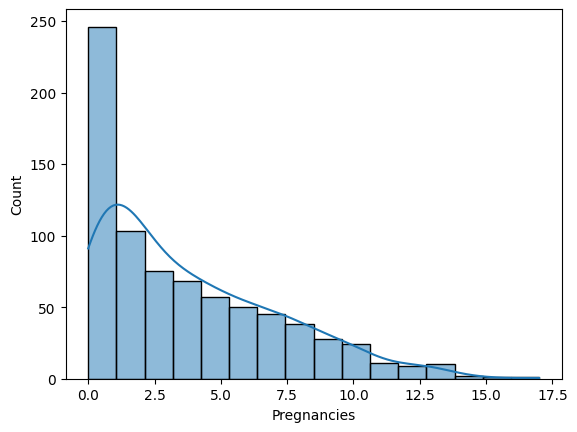

In [10]:
sns.histplot(x='Pregnancies', data=data, kde=True)

The distribution is right-skewed

Most women in this data had between 0 and 3 pregnancies, with very few having more than that.

Those few women with a high number of pregnancies (like 8 or more) could distort a model, so it can help to group or limit those extreme cases.

<Axes: xlabel='Glucose', ylabel='Count'>

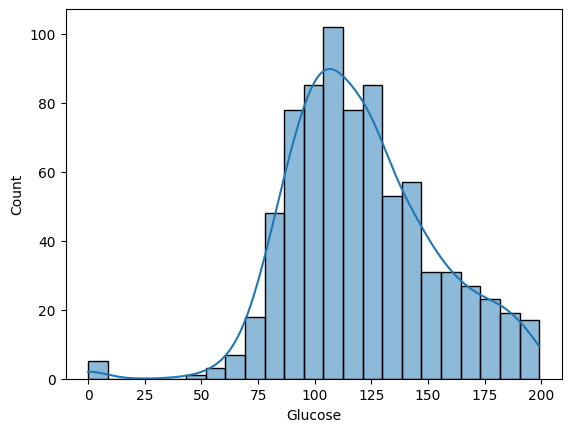

In [11]:
sns.histplot(x='Glucose', data=data, kde=True)

Most people’s glucose readings fall around 90–110 mg/dL, showing a clear peak there.

A small bar at 0 indicates missing test results, and there’s a long tail of higher values (above 140) that you may want to treat as outliers or flag for diabetes risk.

<Axes: xlabel='BloodPressure', ylabel='Count'>

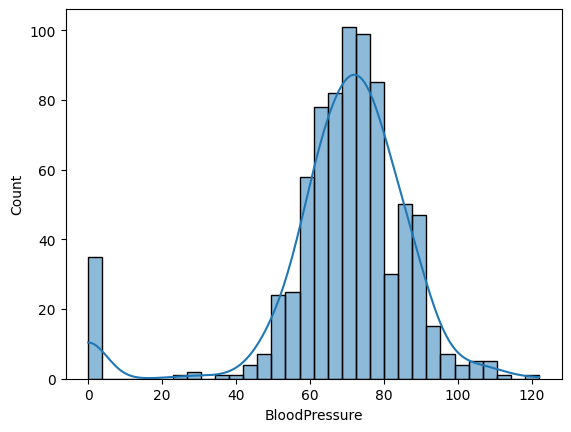

In [12]:
sns.histplot(x='BloodPressure', data=data, kde=True)

<Axes: xlabel='Outcome', ylabel='count'>

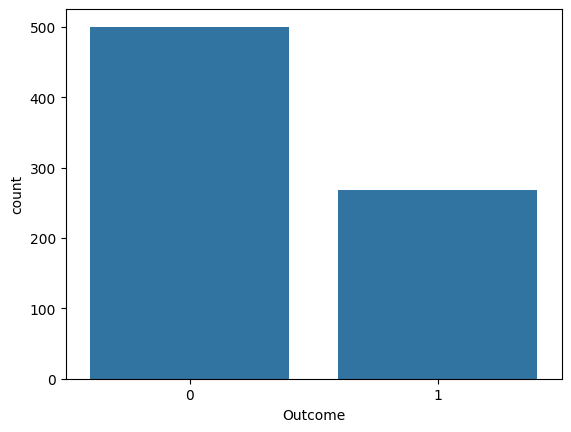

In [13]:
sns.countplot(x='Outcome', data=data)

Insights

Class Imbalance:

There are significantly more non-diabetic patients (Outcome = 0) than diabetic ones (Outcome = 1).

This indicates a class imbalance, which can affect model performance (especially in classification tasks).

<Axes: >

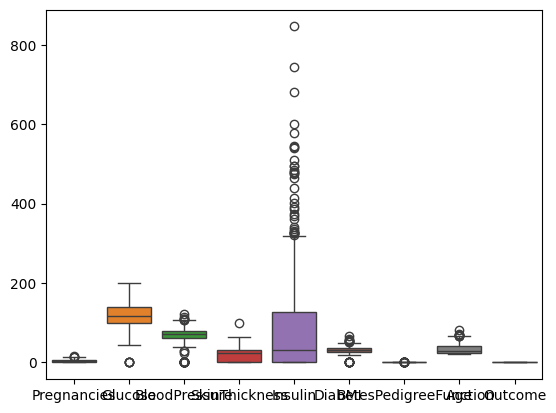

In [14]:
sns.boxplot(data=data)

Insights

Extreme Outliers in 'Insulin':

The 'Insulin' column has many outliers (above 300, even reaching 800+).

This suggests irregular insulin values—many of which may be biologically unrealistic or missing values originally marked as zero and later filled.

Outliers in 'SkinThickness' and 'Glucose':

'SkinThickness' and 'Glucose' also show some outliers, though less extreme than 'Insulin'.

These may affect model training and should be handled via imputation, removal, or scaling.



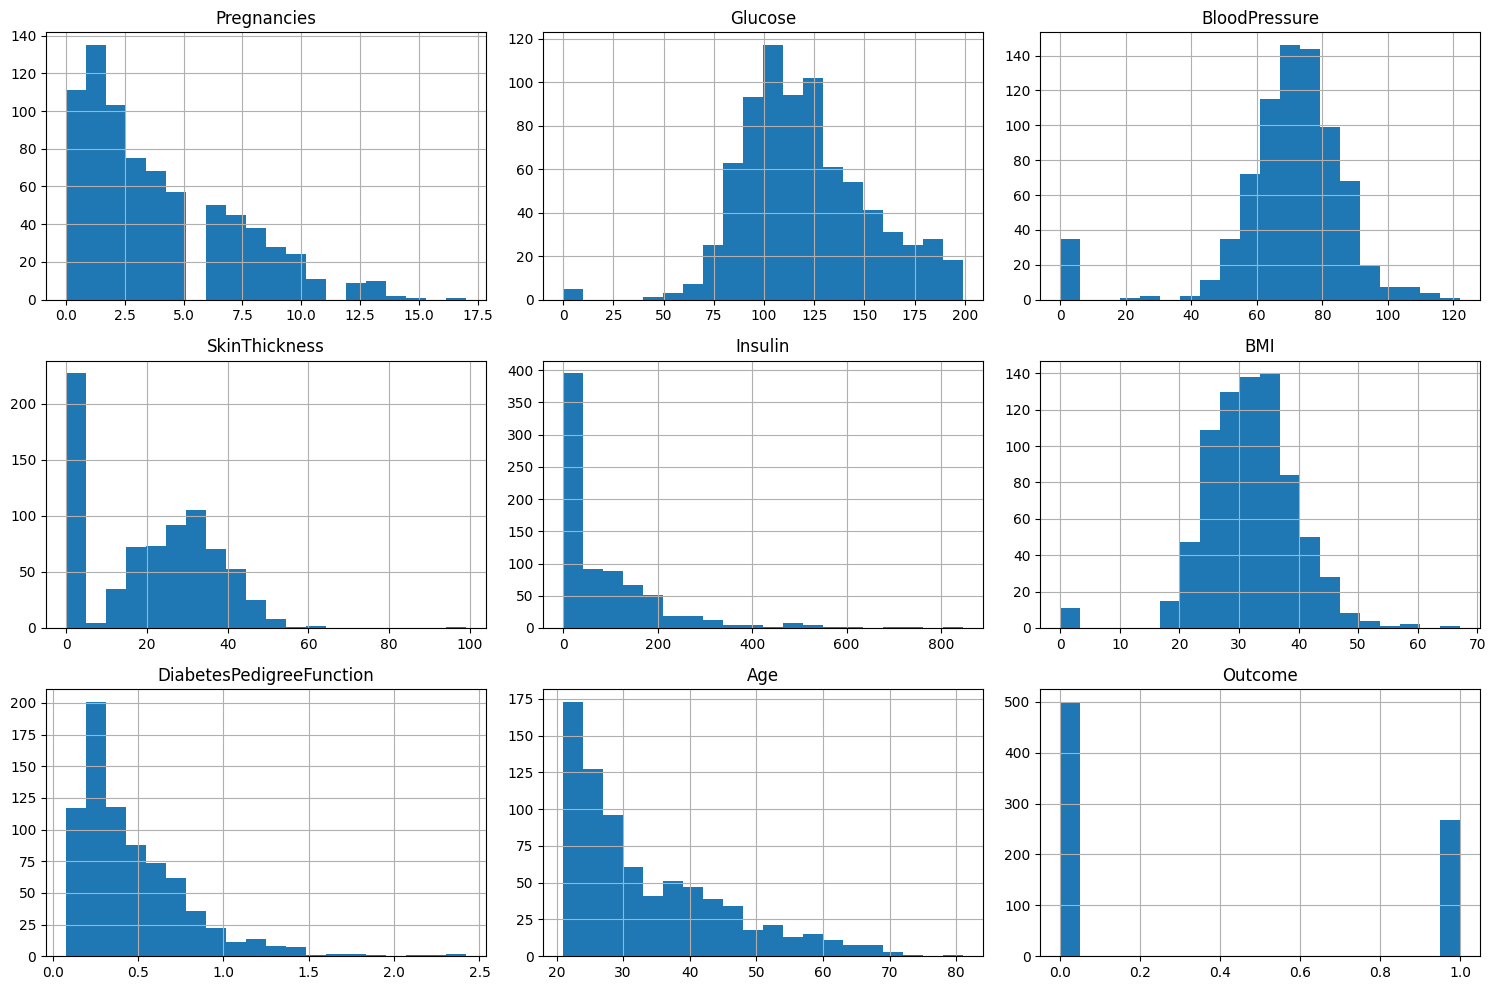

In [15]:
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()


Many Columns Have Skewed Data

Columns like Insulin, DiabetesPedigreeFunction, and Age are right-skewed (more small values, fewer large values).

This means most people have low values, but a few have very high values.

Some Columns Have Suspicious Zeros

Glucose, BloodPressure, SkinThickness, Insulin, and BMI have a bar at 0, which is not realistic.

These zeroes likely mean missing data and should be handled properly (e.g., replaced with average or median).



In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
tc = data.corr()
tc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

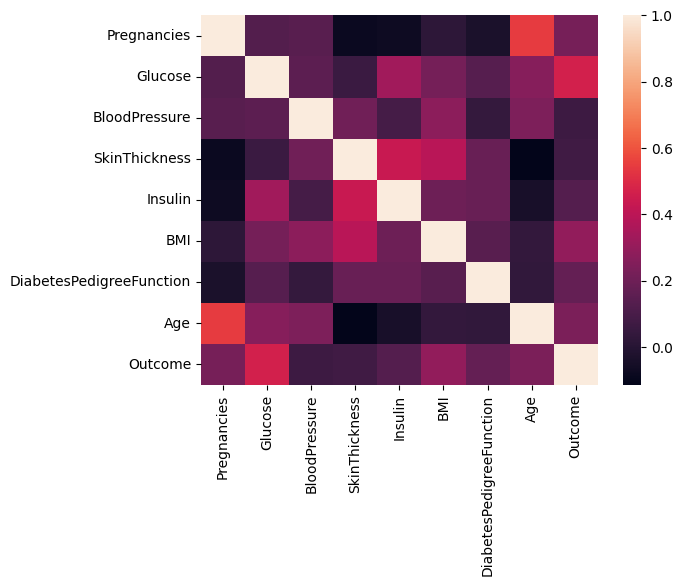

In [18]:
sns.heatmap(tc)

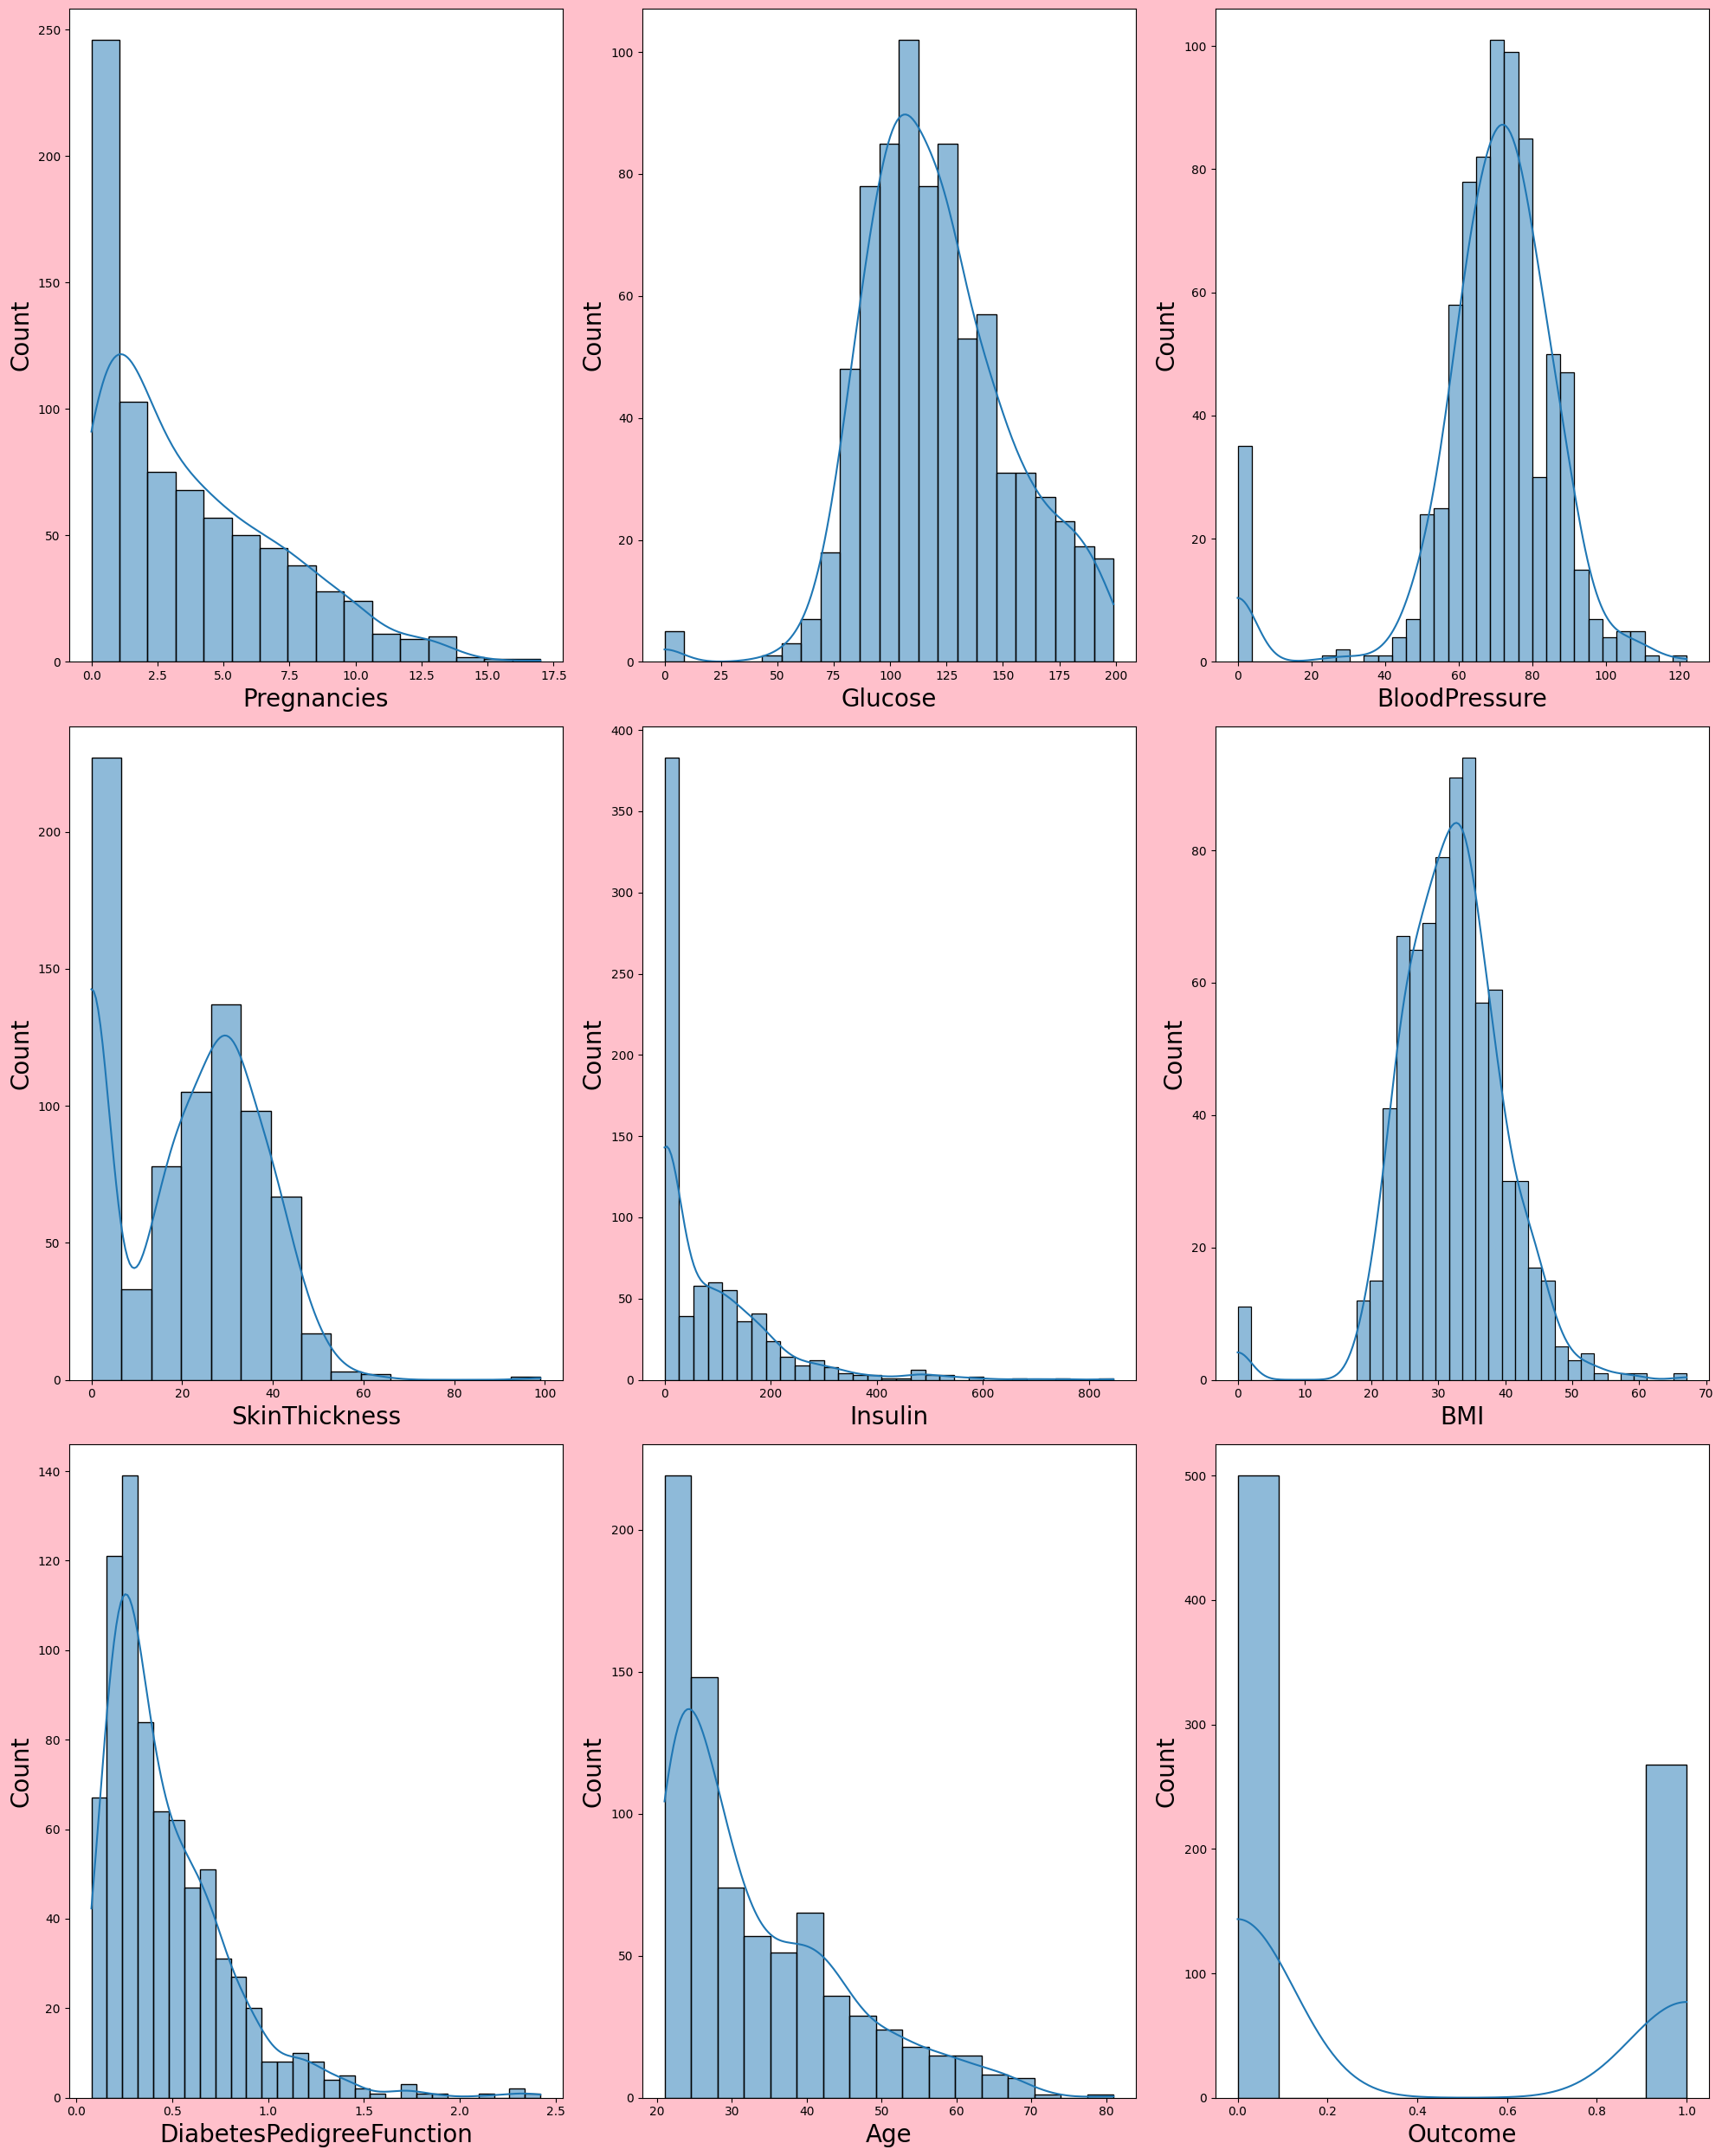

In [19]:
plt.figure(figsize=(20, 25), facecolor='pink')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Count', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
for column in data:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome
